<a href="https://colab.research.google.com/github/RamsRD/desafio-alura-telecom-x-1/blob/main/TelecomX_LATAM_de_Rams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Desafío Telecom X LATAM 1**

#📌 Extracción

##Importación de datos

In [2]:
#Importamos la biblioteca de pandas, numpy, matplotlib y seaborn para manipulación de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importando entropía de Scipy.stats
from scipy.stats import entropy

#Mostrar todas las columnas, sin truncarlas
pd.set_option('display.max_columns', None)

#Mostrar todas las filas, sin truncarlas
pd.set_option('display.max_rows', None)

In [3]:
#URLs del archivo .json con los datos de Telecom X
url1 = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json"

#Leyendo los archivos .json y almacenando los datos en un DataFrame
datos = pd.read_json(url1)

##Analizando los datos

In [4]:
#Viendo el tamaño de los datos
datos.shape

(7267, 6)

In [5]:
#Viendo los primeros 6 datos
datos.head(6)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
5,0013-MHZWF,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [6]:
#Viendo los metadatos de los datos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


#🔧 Transformación

##Transformando los datos del DataFrame

In [7]:
#Aplanar columnas anidadas y crear nuevos DataFrames usando pd_json_normalize
df_customer = pd.json_normalize(datos['customer'])
df_phone = pd.json_normalize(datos['phone'])
df_internet = pd.json_normalize(datos['internet'])
df_account = pd.json_normalize(datos['account'])

#Unir todas las columnas usando pd.concat en un solo DataFrame; eliminando columnas originales para evitar duplicados
datos_transformados = pd.concat(
    [
        datos.drop(columns=['customer', 'phone', 'internet', 'account']),
        df_customer,
        df_phone,
        df_internet,
        df_account
    ],
    axis=1
)

#Renombrar columnas para evitar caracteres especiales y lograr consistencia
datos_transformados.columns = datos_transformados.columns.str.replace('.', '_', regex=False)

#Convertir columnas numéricas que puedan estar como texto
datos_transformados['Charges_Monthly'] = pd.to_numeric(datos_transformados['Charges_Monthly'], errors='coerce')
datos_transformados['Charges_Total'] = pd.to_numeric(datos_transformados['Charges_Total'], errors='coerce')

#Imprimir los resultados para ver cómo quedó
print(datos_transformados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


##Revisando los cambios

In [8]:
#Viendo las primeras 6 filas de los datos
datos_transformados.head(6)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40
5,0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.4,571.45


In [9]:
#Revisar valores faltantes
print("Valores nulos por columna:")
print(datos_transformados.isnull().sum())

Valores nulos por columna:
customerID           0
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
Charges_Monthly      0
Charges_Total       11
dtype: int64


##Comprobación de los datos y manejo de inconsistencias

In [10]:
#Buscar duplicados por customerID
duplicados = datos_transformados.duplicated(subset='customerID').sum()
print(f"Duplicados encontrados: {duplicados}")

#Estandarizar texto: todo en minúsculas para variables categóricas
columnas_objeto = datos_transformados.select_dtypes(include='object').columns
datos_transformados[columnas_objeto] = datos_transformados[columnas_objeto].apply(lambda x: x.str.strip().str.lower())

#Verificación final
datos_transformados.head(6)

Duplicados encontrados: 0


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,0002-orfbo,no,female,0,yes,yes,9,yes,no,dsl,no,yes,no,yes,yes,no,one year,yes,mailed check,65.6,593.30
1,0003-mknfe,no,male,0,no,no,9,yes,yes,dsl,no,no,no,no,no,yes,month-to-month,no,mailed check,59.9,542.40
2,0004-tlhlj,yes,male,0,no,no,4,yes,no,fiber optic,no,no,yes,no,no,no,month-to-month,yes,electronic check,73.9,280.85
3,0011-igkff,yes,male,1,yes,no,13,yes,no,fiber optic,no,yes,yes,no,yes,yes,month-to-month,yes,electronic check,98.0,1237.85
4,0013-exchz,yes,female,1,yes,no,3,yes,no,fiber optic,no,no,no,yes,yes,no,month-to-month,yes,mailed check,83.9,267.40
5,0013-mhzwf,no,female,0,no,yes,9,yes,no,dsl,no,no,no,yes,yes,yes,month-to-month,yes,credit card (automatic),69.4,571.45


In [11]:
#Reemplazar valores nulos en Charges_Total por 0
datos_transformados['Charges_Total'] = datos_transformados['Charges_Total'].fillna(0)

#Eliminar duplicados por customerID
datos_transformados = datos_transformados.drop_duplicates(subset='customerID')

#Estandarizar variables categóricas (minúsculas y sin espacios)
columnas_objeto = datos_transformados.select_dtypes(include='object').columns
datos_transformados[columnas_objeto] = datos_transformados[columnas_objeto].apply(lambda x: x.str.strip().str.lower())

#Revisar resultados
datos_transformados.head(6)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,0002-orfbo,no,female,0,yes,yes,9,yes,no,dsl,no,yes,no,yes,yes,no,one year,yes,mailed check,65.6,593.30
1,0003-mknfe,no,male,0,no,no,9,yes,yes,dsl,no,no,no,no,no,yes,month-to-month,no,mailed check,59.9,542.40
2,0004-tlhlj,yes,male,0,no,no,4,yes,no,fiber optic,no,no,yes,no,no,no,month-to-month,yes,electronic check,73.9,280.85
3,0011-igkff,yes,male,1,yes,no,13,yes,no,fiber optic,no,yes,yes,no,yes,yes,month-to-month,yes,electronic check,98.0,1237.85
4,0013-exchz,yes,female,1,yes,no,3,yes,no,fiber optic,no,no,no,yes,yes,no,month-to-month,yes,mailed check,83.9,267.40
5,0013-mhzwf,no,female,0,no,yes,9,yes,no,dsl,no,no,no,yes,yes,yes,month-to-month,yes,credit card (automatic),69.4,571.45


In [12]:
# Verificar tipos de datos y su consistencia
print(datos_transformados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [13]:
#Revisar si quedan valores nulos
print("\nValores nulos después de la limpieza:")
print(datos_transformados.isnull().sum())


Valores nulos después de la limpieza:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges_Monthly     0
Charges_Total       0
dtype: int64


##Creación de la columna "cuentas diarias"

In [14]:
#Crear la columna Cuentas_Diarias a partir de Charges_Monthly
datos_transformados['Cuentas_Diarias'] = datos_transformados['Charges_Monthly'] / 30

#Redondear a 2 decimales para mejor claridad
datos_transformados['Cuentas_Diarias'] = datos_transformados['Cuentas_Diarias'].round(2)

#Verificación de los cambios
datos_transformados[['Charges_Monthly', 'Cuentas_Diarias']].head()

,Charges_Monthly,Cuentas_Diarias
0,65.6,2.19
1,59.9,2.00
2,73.9,2.46
3,98.0,3.27
4,83.9,2.80


##Observando las variables de los datos de las columnas

In [15]:
#Observando las variables de los datos usando .unique
print(datos_transformados['customerID'].unique())
print(datos_transformados['Churn'].unique())
print(datos_transformados['gender'].unique())
print(datos_transformados['SeniorCitizen'].unique())
print(datos_transformados['Partner'].unique())
print(datos_transformados['Dependents'].unique())
print(datos_transformados['tenure'].unique())

['0002-orfbo' '0003-mknfe' '0004-tlhlj' ... '9992-ujoel' '9993-lhieb'
 '9995-hotoh']
['no' 'yes' '']
['female' 'male']
[0 1]
['yes' 'no']
['yes' 'no']
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]


In [16]:
#Observando las variables de los datos usando .unique
print(datos_transformados['PhoneService'].unique())
print(datos_transformados['MultipleLines'].unique())
print(datos_transformados['InternetService'].unique())
print(datos_transformados['DeviceProtection'].unique())
print(datos_transformados['TechSupport'].unique())

['yes' 'no']
['no' 'yes' 'no phone service']
['dsl' 'fiber optic' 'no']
['no' 'yes' 'no internet service']
['yes' 'no' 'no internet service']


In [17]:
#Observando las variables de los datos usando.unique
print(datos_transformados['OnlineSecurity'].unique)

<bound method Series.unique of 0                        no
1                        no
2                        no
3                        no
4                        no
5                        no
6                       yes
7                       yes
8                       yes
9                       yes
10                      yes
11                      yes
12                       no
13                      yes
14                      yes
15                       no
16                      yes
17                       no
18                      yes
19                       no
20      no internet service
21                       no
22                       no
23      no internet service
24      no internet service
25                      yes
26                       no
27      no internet service
28      no internet service
29      no internet service
30                      yes
31                       no
32      no internet service
33                      yes
34      no intern

In [18]:
#Observando las variables de los datos usando .unique
print(datos_transformados['OnlineBackup'].unique())
print(datos_transformados['StreamingTV'].unique())
print(datos_transformados['StreamingMovies'].unique())
print(datos_transformados['Contract'].unique())
print(datos_transformados['PaperlessBilling'].unique())
print(datos_transformados['PaymentMethod'].unique())

['yes' 'no' 'no internet service']
['yes' 'no' 'no internet service']
['no' 'yes' 'no internet service']
['one year' 'month-to-month' 'two year']
['yes' 'no']
['mailed check' 'electronic check' 'credit card (automatic)'
 'bank transfer (automatic)']


##Estandarización de los datos: traducirlas al español y ajustar sus variables

In [19]:
#Renombrar columnas para que estén en español
nuevos_nombres = {
    'customerID': 'ID Cliente',
    'Churn': 'Tasa de Abandono (Churn)',
    'gender': 'Género',
    'SeniorCitizen': 'Adulto Mayor',
    'Partner': 'Tiene Pareja',
    'Dependents': 'Tiene Dependientes',
    'tenure': 'Meses de Contrato',
    'PhoneService': 'Servicio Telefónico',
    'MultipleLines': 'Múltiples Líneas',
    'InternetService': 'Tipo de Internet',
    'OnlineSecurity': 'Seguridad en Línea',
    'OnlineBackup': 'Respaldo en Línea',
    'DeviceProtection': 'Protección del Equipo',
    'TechSupport': 'Soporte Técnico',
    'StreamingTV': 'TV Streaming',
    'StreamingMovies': 'Películas Streaming',
    'Contract': 'Tipo de Contrato',
    'PaperlessBilling': 'Facturación en Línea',
    'PaymentMethod': 'Método de Pago',
    'Charges_Monthly': 'Cargo Mensual',
    'Charges_Total': 'Cargo Total',
    'Cuentas_Diarias': 'Cargo Diario'

}
datos_transformados.rename(columns=nuevos_nombres, inplace=True)

#Vista previa de los cambios
datos_transformados.head(6)

,ID Cliente,Tasa de Abandono (Churn),Género,Adulto Mayor,Tiene Pareja,Tiene Dependientes,Meses de Contrato,Servicio Telefónico,Múltiples Líneas,Tipo de Internet,Seguridad en Línea,Respaldo en Línea,Protección del Equipo,Soporte Técnico,TV Streaming,Películas Streaming,Tipo de Contrato,Facturación en Línea,Método de Pago,Cargo Mensual,Cargo Total,Cargo Diario
0,0002-orfbo,no,female,0,yes,yes,9,yes,no,dsl,no,yes,no,yes,yes,no,one year,yes,mailed check,65.6,593.30,2.19
1,0003-mknfe,no,male,0,no,no,9,yes,yes,dsl,no,no,no,no,no,yes,month-to-month,no,mailed check,59.9,542.40,2.00
2,0004-tlhlj,yes,male,0,no,no,4,yes,no,fiber optic,no,no,yes,no,no,no,month-to-month,yes,electronic check,73.9,280.85,2.46
3,0011-igkff,yes,male,1,yes,no,13,yes,no,fiber optic,no,yes,yes,no,yes,yes,month-to-month,yes,electronic check,98.0,1237.85,3.27
4,0013-exchz,yes,female,1,yes,no,3,yes,no,fiber optic,no,no,no,yes,yes,no,month-to-month,yes,mailed check,83.9,267.40,2.80
5,0013-mhzwf,no,female,0,no,yes,9,yes,no,dsl,no,no,no,yes,yes,yes,month-to-month,yes,credit card (automatic),69.4,571.45,2.31


In [20]:
#Traducir y capitalizar Género
datos_transformados['Género'] = datos_transformados['Género'].map({
    'female': 'Femenino',
    'male': 'Masculino'
})

In [21]:
#Lista de columnas para inspeccionar
columnas_a_revisar = [
    'ID Cliente', 'Tasa de Abandono (Churn)', 'Género', 'Adulto Mayor', 'Tiene Pareja', 'Tiene Dependientes',
    'Servicio Telefónico', 'Múltiples Líneas', 'Tipo de Internet', 'Seguridad en Línea',
    'Respaldo en Línea', 'Protección del Equipo', 'Soporte Técnico', 'TV Streaming',
    'Películas Streaming', 'Tipo de Contrato', 'Facturación en Línea', 'Método de Pago',
]

#Mostrar valores únicos para cada columna, ordenadamente
for col in columnas_a_revisar:
    valores_unicos = datos_transformados[col].unique()
    print(f"Columna: {col}")
    print(f"Valores únicos ({len(valores_unicos)}): {valores_unicos}\n")

Columna: ID Cliente
Valores únicos (7267): ['0002-orfbo' '0003-mknfe' '0004-tlhlj' ... '9992-ujoel' '9993-lhieb'
 '9995-hotoh']

Columna: Tasa de Abandono (Churn)
Valores únicos (3): ['no' 'yes' '']

Columna: Género
Valores únicos (2): ['Femenino' 'Masculino']

Columna: Adulto Mayor
Valores únicos (2): [0 1]

Columna: Tiene Pareja
Valores únicos (2): ['yes' 'no']

Columna: Tiene Dependientes
Valores únicos (2): ['yes' 'no']

Columna: Servicio Telefónico
Valores únicos (2): ['yes' 'no']

Columna: Múltiples Líneas
Valores únicos (3): ['no' 'yes' 'no phone service']

Columna: Tipo de Internet
Valores únicos (3): ['dsl' 'fiber optic' 'no']

Columna: Seguridad en Línea
Valores únicos (3): ['no' 'yes' 'no internet service']

Columna: Respaldo en Línea
Valores únicos (3): ['yes' 'no' 'no internet service']

Columna: Protección del Equipo
Valores únicos (3): ['no' 'yes' 'no internet service']

Columna: Soporte Técnico
Valores únicos (3): ['yes' 'no' 'no internet service']

Columna: TV Streamin

##Ajustando la columna de adulto mayor

In [22]:
#Ajustar la columna de Adulto Mayor para que sea object y acepte valores númericos
datos_transformados['Adulto Mayor'] = datos_transformados['Adulto Mayor'].map({0: 'No', 1: 'Sí'})

In [23]:
#Lista con las columnas binarias que queremos mapear
binarias = [
    'Tiene Pareja',
    'Tiene Dependientes',
    'Servicio Telefónico',
    'Facturación en Línea',
]

for col in binarias:
    if col in datos_transformados.columns:
        datos_transformados[col] = datos_transformados[col].map({'yes': 'Sí', 'no': 'No'})

In [24]:
#Vista previa de los cambios
datos_transformados.head(6)

,ID Cliente,Tasa de Abandono (Churn),Género,Adulto Mayor,Tiene Pareja,Tiene Dependientes,Meses de Contrato,Servicio Telefónico,Múltiples Líneas,Tipo de Internet,Seguridad en Línea,Respaldo en Línea,Protección del Equipo,Soporte Técnico,TV Streaming,Películas Streaming,Tipo de Contrato,Facturación en Línea,Método de Pago,Cargo Mensual,Cargo Total,Cargo Diario
0,0002-orfbo,no,Femenino,No,Sí,Sí,9,Sí,no,dsl,no,yes,no,yes,yes,no,one year,Sí,mailed check,65.6,593.30,2.19
1,0003-mknfe,no,Masculino,No,No,No,9,Sí,yes,dsl,no,no,no,no,no,yes,month-to-month,No,mailed check,59.9,542.40,2.00
2,0004-tlhlj,yes,Masculino,No,No,No,4,Sí,no,fiber optic,no,no,yes,no,no,no,month-to-month,Sí,electronic check,73.9,280.85,2.46
3,0011-igkff,yes,Masculino,Sí,Sí,No,13,Sí,no,fiber optic,no,yes,yes,no,yes,yes,month-to-month,Sí,electronic check,98.0,1237.85,3.27
4,0013-exchz,yes,Femenino,Sí,Sí,No,3,Sí,no,fiber optic,no,no,no,yes,yes,no,month-to-month,Sí,mailed check,83.9,267.40,2.80
5,0013-mhzwf,no,Femenino,No,No,Sí,9,Sí,no,dsl,no,no,no,yes,yes,yes,month-to-month,Sí,credit card (automatic),69.4,571.45,2.31


In [25]:
#Revisar si quedan valores nulos
print("\nValores nulos después de la limpieza:")
print(datos_transformados.isnull().sum())


Valores nulos después de la limpieza:
ID Cliente                  0
Tasa de Abandono (Churn)    0
Género                      0
Adulto Mayor                0
Tiene Pareja                0
Tiene Dependientes          0
Meses de Contrato           0
Servicio Telefónico         0
Múltiples Líneas            0
Tipo de Internet            0
Seguridad en Línea          0
Respaldo en Línea           0
Protección del Equipo       0
Soporte Técnico             0
TV Streaming                0
Películas Streaming         0
Tipo de Contrato            0
Facturación en Línea        0
Método de Pago              0
Cargo Mensual               0
Cargo Total                 0
Cargo Diario                0
dtype: int64


##Ajustando la columna de tasa de abandono (churn)

In [26]:
#Definir función para mapear y traducir valores
def mapear_churn(valor):
    if pd.isna(valor) or valor == '':
        #Consideramos vacíos o nulos como 'No' (cliente no abandonó)
        return 'No'
    valor = str(valor).strip().lower()
    if valor == 'yes':
        return 'Sí'
    elif valor == 'no':
        return 'No'
    else:
        #Por si hay valores inesperados, los consideramos como 'No'
        return 'No'

#Aplicar la función a la columna
datos_transformados['Tasa de Abandono (Churn)'] = datos_transformados['Tasa de Abandono (Churn)'].apply(mapear_churn)

In [27]:
#Vista previa de los cambios
datos_transformados.head(6)

,ID Cliente,Tasa de Abandono (Churn),Género,Adulto Mayor,Tiene Pareja,Tiene Dependientes,Meses de Contrato,Servicio Telefónico,Múltiples Líneas,Tipo de Internet,Seguridad en Línea,Respaldo en Línea,Protección del Equipo,Soporte Técnico,TV Streaming,Películas Streaming,Tipo de Contrato,Facturación en Línea,Método de Pago,Cargo Mensual,Cargo Total,Cargo Diario
0,0002-orfbo,No,Femenino,No,Sí,Sí,9,Sí,no,dsl,no,yes,no,yes,yes,no,one year,Sí,mailed check,65.6,593.30,2.19
1,0003-mknfe,No,Masculino,No,No,No,9,Sí,yes,dsl,no,no,no,no,no,yes,month-to-month,No,mailed check,59.9,542.40,2.00
2,0004-tlhlj,Sí,Masculino,No,No,No,4,Sí,no,fiber optic,no,no,yes,no,no,no,month-to-month,Sí,electronic check,73.9,280.85,2.46
3,0011-igkff,Sí,Masculino,Sí,Sí,No,13,Sí,no,fiber optic,no,yes,yes,no,yes,yes,month-to-month,Sí,electronic check,98.0,1237.85,3.27
4,0013-exchz,Sí,Femenino,Sí,Sí,No,3,Sí,no,fiber optic,no,no,no,yes,yes,no,month-to-month,Sí,mailed check,83.9,267.40,2.80
5,0013-mhzwf,No,Femenino,No,No,Sí,9,Sí,no,dsl,no,no,no,yes,yes,yes,month-to-month,Sí,credit card (automatic),69.4,571.45,2.31


In [28]:
#Revisar si quedan valores nulos
print("\nValores nulos después de la limpieza:")
print(datos_transformados.isnull().sum())


Valores nulos después de la limpieza:
ID Cliente                  0
Tasa de Abandono (Churn)    0
Género                      0
Adulto Mayor                0
Tiene Pareja                0
Tiene Dependientes          0
Meses de Contrato           0
Servicio Telefónico         0
Múltiples Líneas            0
Tipo de Internet            0
Seguridad en Línea          0
Respaldo en Línea           0
Protección del Equipo       0
Soporte Técnico             0
TV Streaming                0
Películas Streaming         0
Tipo de Contrato            0
Facturación en Línea        0
Método de Pago              0
Cargo Mensual               0
Cargo Total                 0
Cargo Diario                0
dtype: int64


In [29]:
#Mostrar valores únicos para cada columna, ordenadamente
for col in columnas_a_revisar:
    valores_unicos = datos_transformados[col].unique()
    print(f"Columna: {col}")
    print(f"Valores únicos ({len(valores_unicos)}): {valores_unicos}\n")

Columna: ID Cliente
Valores únicos (7267): ['0002-orfbo' '0003-mknfe' '0004-tlhlj' ... '9992-ujoel' '9993-lhieb'
 '9995-hotoh']

Columna: Tasa de Abandono (Churn)
Valores únicos (2): ['No' 'Sí']

Columna: Género
Valores únicos (2): ['Femenino' 'Masculino']

Columna: Adulto Mayor
Valores únicos (2): ['No' 'Sí']

Columna: Tiene Pareja
Valores únicos (2): ['Sí' 'No']

Columna: Tiene Dependientes
Valores únicos (2): ['Sí' 'No']

Columna: Servicio Telefónico
Valores únicos (2): ['Sí' 'No']

Columna: Múltiples Líneas
Valores únicos (3): ['no' 'yes' 'no phone service']

Columna: Tipo de Internet
Valores únicos (3): ['dsl' 'fiber optic' 'no']

Columna: Seguridad en Línea
Valores únicos (3): ['no' 'yes' 'no internet service']

Columna: Respaldo en Línea
Valores únicos (3): ['yes' 'no' 'no internet service']

Columna: Protección del Equipo
Valores únicos (3): ['no' 'yes' 'no internet service']

Columna: Soporte Técnico
Valores únicos (3): ['yes' 'no' 'no internet service']

Columna: TV Streaming

##Transformaciones de las columnas con datos aún no cambiados

In [30]:
#Diccionarios de traducción para los valores
map_si_no = {'yes': 'Sí', 'no': 'No'}
map_no_service_phone = {'no phone service': 'Sin servicio telefónico'}
map_no_service_internet = {'no internet service': 'Sin servicio de internet'}

#Columnas con valores 'yes'/'no' que faltan traducir
columnas_si_no = [
    'Múltiples Líneas',
    'Seguridad en Línea',
    'Respaldo en Línea',
    'Protección del Equipo',
    'Soporte Técnico',
    'TV Streaming',
    'Películas Streaming'
]

#Traducir valores en columnas binarias con 'yes'/'no'
for col in columnas_si_no:
    if col in datos_transformados.columns:
        datos_transformados[col] = datos_transformados[col].map(lambda x: map_si_no.get(x, x))

#Traducir valores 'no phone service' en 'Múltiples Líneas'
if 'Múltiples Líneas' in datos_transformados.columns:
    datos_transformados['Múltiples Líneas'] = datos_transformados['Múltiples Líneas'].replace(map_no_service_phone)

#Traducir valores 'no internet service' en las columnas relacionadas con internet
cols_no_internet_service = [
    'Seguridad en Línea',
    'Respaldo en Línea',
    'Protección del Equipo',
    'Soporte Técnico',
    'TV Streaming',
    'Películas Streaming'
]

for col in cols_no_internet_service:
    if col in datos_transformados.columns:
        datos_transformados[col] = datos_transformados[col].replace(map_no_service_internet)

#Traducir valores de 'Tipo de Contrato'
map_tipo_contrato = {
    'one year': 'Un año',
    'month-to-month': 'Mes a mes',
    'two year': 'Dos años'
}

if 'Tipo de Contrato' in datos_transformados.columns:
    datos_transformados['Tipo de Contrato'] = datos_transformados['Tipo de Contrato'].map(map_tipo_contrato)

#Traducir valores de 'Método de Pago'
map_metodo_pago = {
    'mailed check': 'Cheque enviado por correo',
    'electronic check': 'Cheque electrónico',
    'credit card (automatic)': 'Tarjeta de crédito (automático)',
    'bank transfer (automatic)': 'Transferencia bancaria (automático)'
}

if 'Método de Pago' in datos_transformados.columns:
    datos_transformados['Método de Pago'] = datos_transformados['Método de Pago'].map(map_metodo_pago)

#Traducir valores de 'Tipo de Internet'
map_tipo_internet = {
    'dsl': 'DSL',
    'fiber optic': 'Fibra Óptica',
    'no': 'Sin Servicio'
}

if 'Tipo de Internet' in datos_transformados.columns:
    datos_transformados['Tipo de Internet'] = datos_transformados['Tipo de Internet'].map(map_tipo_internet)

In [31]:
#Verificar resultados
cols_a_verificar = columnas_si_no + ['Múltiples Líneas', 'Tipo de Contrato', 'Método de Pago', 'Tipo de Internet']
for col in cols_a_verificar:
    if col in datos_transformados.columns:
        print(f"{col}: {datos_transformados[col].unique()}")

Múltiples Líneas: ['No' 'Sí' 'Sin servicio telefónico']
Seguridad en Línea: ['No' 'Sí' 'Sin servicio de internet']
Respaldo en Línea: ['Sí' 'No' 'Sin servicio de internet']
Protección del Equipo: ['No' 'Sí' 'Sin servicio de internet']
Soporte Técnico: ['Sí' 'No' 'Sin servicio de internet']
TV Streaming: ['Sí' 'No' 'Sin servicio de internet']
Películas Streaming: ['No' 'Sí' 'Sin servicio de internet']
Múltiples Líneas: ['No' 'Sí' 'Sin servicio telefónico']
Tipo de Contrato: ['Un año' 'Mes a mes' 'Dos años']
Método de Pago: ['Cheque enviado por correo' 'Cheque electrónico'
 'Tarjeta de crédito (automático)' 'Transferencia bancaria (automático)']
Tipo de Internet: ['DSL' 'Fibra Óptica' 'Sin Servicio']


In [32]:
#Vista previa de los cambios
datos_transformados.head(6)

,ID Cliente,Tasa de Abandono (Churn),Género,Adulto Mayor,Tiene Pareja,Tiene Dependientes,Meses de Contrato,Servicio Telefónico,Múltiples Líneas,Tipo de Internet,Seguridad en Línea,Respaldo en Línea,Protección del Equipo,Soporte Técnico,TV Streaming,Películas Streaming,Tipo de Contrato,Facturación en Línea,Método de Pago,Cargo Mensual,Cargo Total,Cargo Diario
0,0002-orfbo,No,Femenino,No,Sí,Sí,9,Sí,No,DSL,No,Sí,No,Sí,Sí,No,Un año,Sí,Cheque enviado por correo,65.6,593.30,2.19
1,0003-mknfe,No,Masculino,No,No,No,9,Sí,Sí,DSL,No,No,No,No,No,Sí,Mes a mes,No,Cheque enviado por correo,59.9,542.40,2.00
2,0004-tlhlj,Sí,Masculino,No,No,No,4,Sí,No,Fibra Óptica,No,No,Sí,No,No,No,Mes a mes,Sí,Cheque electrónico,73.9,280.85,2.46
3,0011-igkff,Sí,Masculino,Sí,Sí,No,13,Sí,No,Fibra Óptica,No,Sí,Sí,No,Sí,Sí,Mes a mes,Sí,Cheque electrónico,98.0,1237.85,3.27
4,0013-exchz,Sí,Femenino,Sí,Sí,No,3,Sí,No,Fibra Óptica,No,No,No,Sí,Sí,No,Mes a mes,Sí,Cheque enviado por correo,83.9,267.40,2.80
5,0013-mhzwf,No,Femenino,No,No,Sí,9,Sí,No,DSL,No,No,No,Sí,Sí,Sí,Mes a mes,Sí,Tarjeta de crédito (automático),69.4,571.45,2.31


In [33]:
#Revisar si quedan valores nulos
print("\nValores nulos después de la limpieza:")
print(datos_transformados.isnull().sum())


Valores nulos después de la limpieza:
ID Cliente                  0
Tasa de Abandono (Churn)    0
Género                      0
Adulto Mayor                0
Tiene Pareja                0
Tiene Dependientes          0
Meses de Contrato           0
Servicio Telefónico         0
Múltiples Líneas            0
Tipo de Internet            0
Seguridad en Línea          0
Respaldo en Línea           0
Protección del Equipo       0
Soporte Técnico             0
TV Streaming                0
Películas Streaming         0
Tipo de Contrato            0
Facturación en Línea        0
Método de Pago              0
Cargo Mensual               0
Cargo Total                 0
Cargo Diario                0
dtype: int64


##Eliminando la columa de "ID Cliente", para facilitarnos el análisis de los datos

In [34]:
#Eliminando la columna
datos_transformados.drop('ID Cliente', axis=1, inplace=True)

In [35]:
#Vista previa de los cambios
datos_transformados.head(6)

,Tasa de Abandono (Churn),Género,Adulto Mayor,Tiene Pareja,Tiene Dependientes,Meses de Contrato,Servicio Telefónico,Múltiples Líneas,Tipo de Internet,Seguridad en Línea,Respaldo en Línea,Protección del Equipo,Soporte Técnico,TV Streaming,Películas Streaming,Tipo de Contrato,Facturación en Línea,Método de Pago,Cargo Mensual,Cargo Total,Cargo Diario
0,No,Femenino,No,Sí,Sí,9,Sí,No,DSL,No,Sí,No,Sí,Sí,No,Un año,Sí,Cheque enviado por correo,65.6,593.30,2.19
1,No,Masculino,No,No,No,9,Sí,Sí,DSL,No,No,No,No,No,Sí,Mes a mes,No,Cheque enviado por correo,59.9,542.40,2.00
2,Sí,Masculino,No,No,No,4,Sí,No,Fibra Óptica,No,No,Sí,No,No,No,Mes a mes,Sí,Cheque electrónico,73.9,280.85,2.46
3,Sí,Masculino,Sí,Sí,No,13,Sí,No,Fibra Óptica,No,Sí,Sí,No,Sí,Sí,Mes a mes,Sí,Cheque electrónico,98.0,1237.85,3.27
4,Sí,Femenino,Sí,Sí,No,3,Sí,No,Fibra Óptica,No,No,No,Sí,Sí,No,Mes a mes,Sí,Cheque enviado por correo,83.9,267.40,2.80
5,No,Femenino,No,No,Sí,9,Sí,No,DSL,No,No,No,Sí,Sí,Sí,Mes a mes,Sí,Tarjeta de crédito (automático),69.4,571.45,2.31


#📊 Carga y análisis

##Análisis descriptivo, datos con variables numéricos

In [36]:

#Seleccionamos las columnas numéricas
numericas = datos_transformados.select_dtypes(include=[np.number])

#Calculamos métricas estadísticas relevantes
analisis_numericas = pd.DataFrame({
    'Media': numericas.mean(),
    'Mediana': numericas.median(),
    'Desviación estándar': numericas.std(),
    'Varianza': numericas.var(),
    'Mínimo': numericas.min(),
    'Máximo': numericas.max(),
    'Rango': numericas.max() - numericas.min(),
    '1er cuartil (Q1)': numericas.quantile(0.25),
    '3er cuartil (Q3)': numericas.quantile(0.75),
    'IQR': numericas.quantile(0.75) - numericas.quantile(0.25)
})

#Mostrar resultados
print("\nAnálisis descriptivo de variables numéricas:\n")
print(analisis_numericas)


Análisis descriptivo de variables numéricas:

                         Media  Mediana  Desviación estándar      Varianza  \
Meses de Contrato    32.346498    29.00            24.571773  6.037720e+02   
Cargo Mensual        64.720098    70.30            30.129572  9.077911e+02   
Cargo Total        2277.182035  1389.20          2268.648587  5.146766e+06   
Cargo Diario          2.157292     2.34             1.004407  1.008833e+00   

                   Mínimo   Máximo    Rango  1er cuartil (Q1)  \
Meses de Contrato    0.00    72.00    72.00             9.000   
Cargo Mensual       18.25   118.75   100.50            35.425   
Cargo Total          0.00  8684.80  8684.80           396.200   
Cargo Diario         0.61     3.96     3.35             1.180   

                   3er cuartil (Q3)       IQR  
Meses de Contrato            55.000    46.000  
Cargo Mensual                89.875    54.450  
Cargo Total                3778.525  3382.325  
Cargo Diario                  2.995     1.81

##Análisis descriptivo, datos con variables categóricas

In [37]:
#Seleccionamos las columnas categóricas / tipo objeto
categoricas = datos_transformados.select_dtypes(exclude=[np.number])

#Creamos un diccionario para guardar los análisis
analisis_categoricas = {}

for col in categoricas.columns:
    conteo = categoricas[col].value_counts(dropna=False)
    porcentaje = round((conteo / len(categoricas)) * 100, 2)
    moda = categoricas[col].mode()[0] if not categoricas[col].mode().empty else None
    n_categorias = categoricas[col].nunique(dropna=False)

    #Calculamos la entropía con base en las frecuencias relativas (evitar nan)
    frec_relativa = conteo / conteo.sum()
    entropia = entropy(frec_relativa, base=2)  # base 2 para interpretar en bits

    analisis_categoricas[col] = pd.DataFrame({
        'Frecuencia': conteo,
        'Porcentaje (%)': porcentaje
    })
    #Agregamos filas extra con resumen
    resumen = pd.DataFrame({
        'Frecuencia': [len(categoricas)],
        'Porcentaje (%)': [np.nan]
    }, index=['Total registros'])
    resumen.loc['Moda'] = [moda, np.nan]
    resumen.loc['N categorías'] = [n_categorias, np.nan]
    resumen.loc['Entropía (bits)'] = [round(entropia, 3), np.nan]

    analisis_categoricas[col] = pd.concat([analisis_categoricas[col], resumen])

#Mostrar resultados
print("\nAnálisis descriptivo de variables categóricas:\n")
for col, df in analisis_categoricas.items():
    print(f"\n=================Variable: {col}=================\n")
    #Reemplaza NaN por cadena vacía para imprimir más limpio
    print(df.fillna(''))


Análisis descriptivo de variables categóricas:


=================Variable: Tasa de Abandono (Churn)=================

                Frecuencia Porcentaje (%)
No                    5398          74.28
Sí                    1869          25.72
Total registros       7267               
Moda                    No               
N categorías           2.0               
Entropía (bits)      0.822               

=================Variable: Género=================

                Frecuencia Porcentaje (%)
Masculino             3675          50.57
Femenino              3592          49.43
Total registros       7267               
Moda             Masculino               
N categorías           2.0               
Entropía (bits)        1.0               

=================Variable: Adulto Mayor=================

                Frecuencia Porcentaje (%)
No                    6085          83.73
Sí                    1182          16.27
Total registros       7267               
Moda        

##Distribución de la tasa de evasión (churn)

In [38]:
#Datos para los gráficos
datos_churn = pd.DataFrame({
    'Churn': ['No', 'Sí'],
    'Cantidad': [5398, 1869],
    'Porcentaje': [74.28, 25.72]
})

###Gráfico de barras verticales: número de clientes de acuerdo a la tasa de abandono (churn) y su género


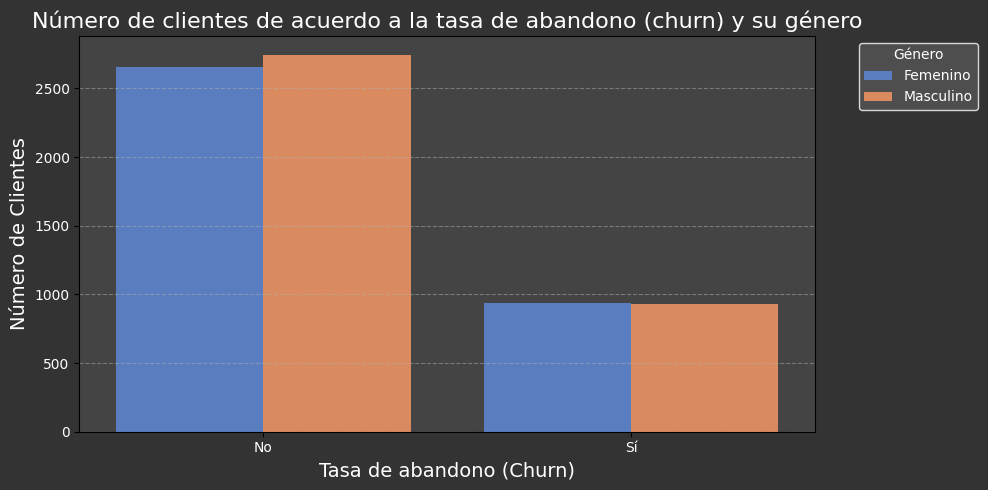

In [39]:
#Creando un gráfico de barras
plt.figure(figsize=(10, 5))
sns.countplot(data=datos_transformados, x='Tasa de Abandono (Churn)', hue='Género', palette='muted')

#Título del gráfico con sus características
plt.title('Número de clientes de acuerdo a la tasa de abandono (churn) y su género', fontsize=16, color='white')

#Especificaciones de los labels
plt.xlabel('Tasa de abandono (Churn)', fontsize=14, color='white')
plt.ylabel('Número de Clientes', fontsize=14, color='white')

#Ajustando los labels
plt.xticks(rotation=0, color='white')
plt.yticks(color='white')

#Añadiendo un cuadro de leyenda para mejor entendimiento del gráfico
leg = plt.legend(title='Género', bbox_to_anchor=(1.05, 1), loc='upper left')
leg.get_frame().set_facecolor('#555555')
leg.get_frame().set_edgecolor('white')
plt.setp(leg.get_texts(), color='white')
plt.setp(leg.get_title(), color='white')

#Ajustando el cuadriculado
plt.grid(axis='y', linestyle='--', alpha=0.5)

#Ajustando el fondo del gráfico y de las figuras
plt.gca().set_facecolor('#444444')
plt.gcf().set_facecolor('#333333')

#Mostrar el gráfico
plt.tight_layout()
plt.show()

###Gráfico de pastel: proporción de clientes de acuerdo a su tasa de abandono (churn)

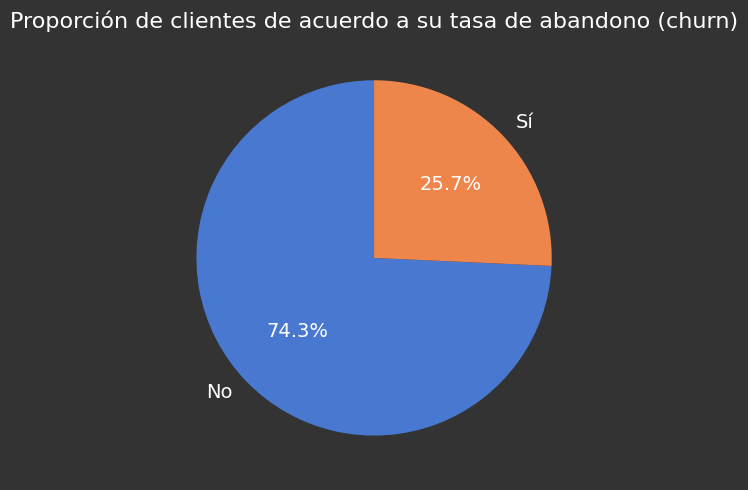

In [40]:
#Creando el gráfico de pastel
plt.figure(figsize=(10, 5))

#Paleta de colores
colors = sns.color_palette('muted')

plt.pie(datos_churn['Porcentaje'], labels=datos_churn['Churn'], autopct='%1.1f%%', colors=colors, startangle=90, textprops={'fontsize':14, 'color':'white'})

#Título del gráfico
plt.title('Proporción de clientes de acuerdo a su tasa de abandono (churn)', fontsize=16, color='white')

#Cambiar fondo de la figura
plt.gcf().set_facecolor('#333333')

#Mostrar el gráfico
plt.tight_layout()
plt.show()

###Gráfico de barras verticales: recuento de clientes por género y tasa de abandono (churn)

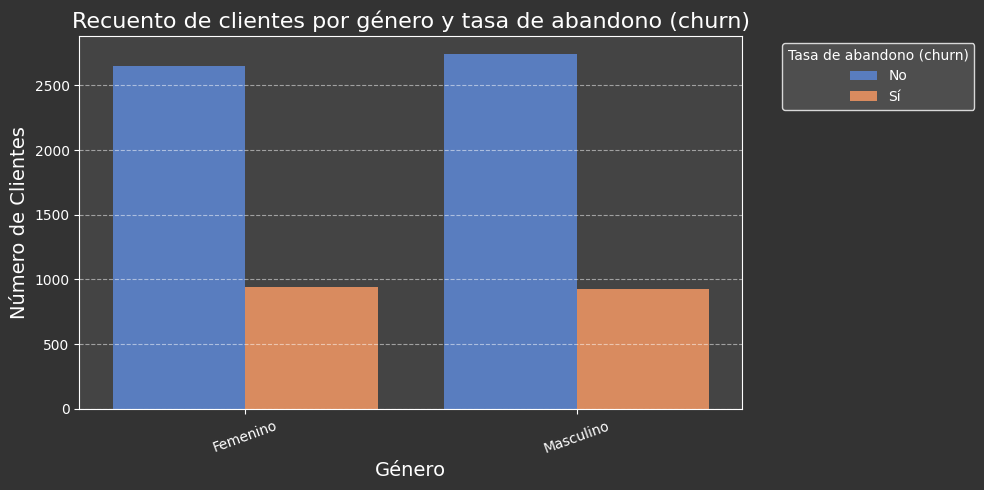

In [41]:
#Creando el gráfico de barras
plt.style.use('dark_background')
plt.figure(figsize=(10, 5))
sns.countplot(data=datos_transformados,
              x='Género',
              hue='Tasa de Abandono (Churn)',
              palette='muted')

#Título del gráfico
plt.title('Recuento de clientes por género y tasa de abandono (churn)', fontsize=16, color='white')

#Especificaciones de labels
plt.xlabel('Género', fontsize=14, color='white')
plt.ylabel('Número de Clientes', fontsize=14, color='white')

#Ajustando labels
plt.xticks(rotation=20, color='white')
plt.yticks(color='white')

#Leyenda con fondo personalizado
leg = plt.legend(title='Tasa de abandono (churn)', bbox_to_anchor=(1.05, 1), loc='upper left')
leg.get_frame().set_facecolor('#555555')
leg.get_frame().set_edgecolor('white')
plt.setp(leg.get_texts(), color='white')
plt.setp(leg.get_title(), color='white')

#Ajustando el cuadriculado
plt.grid(axis='y', linestyle='--', alpha=0.5)

#Acomodando el color del fondo y las figuras
plt.gca().set_facecolor('#444444')
plt.gcf().set_facecolor('#333333')

#Mostrar el gráfico
plt.tight_layout()
plt.show()

###Gráfico de barras verticales: recuento de clientes por tipo de contrato y estado de abandono (churn)

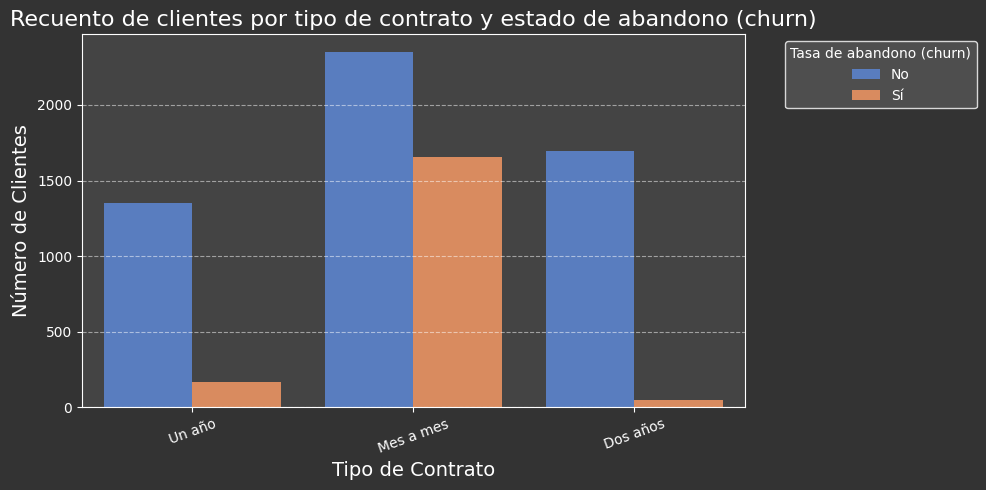

In [42]:
#Creando el gráfico
plt.style.use('dark_background')
plt.figure(figsize=(10, 5))
sns.countplot(data=datos_transformados,
              x='Tipo de Contrato',
              hue='Tasa de Abandono (Churn)',
              palette='muted')

#Título del gráfico
plt.title('Recuento de clientes por tipo de contrato y estado de abandono (churn)', fontsize=16, color='white')

#Especificando labels
plt.xlabel('Tipo de Contrato', fontsize=14, color='white')
plt.ylabel('Número de Clientes', fontsize=14, color='white')

#Ajustando los labels
plt.xticks(rotation=20, color='white')
plt.yticks(color='white')

#Ajustando la leyenda
leg = plt.legend(title='Tasa de abandono (churn)', bbox_to_anchor=(1.05, 1), loc='upper left')
leg.get_frame().set_facecolor('#555555')
leg.get_frame().set_edgecolor('white')
plt.setp(leg.get_texts(), color='white')
plt.setp(leg.get_title(), color='white')

#Ajustando el cuadriculado
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.gca().set_facecolor('#444444')
plt.gcf().set_facecolor('#333333')

#Mostrar el gráfico
plt.tight_layout()
plt.show()

###Gráfico de barras verticales: recuento de clientes por método de pago y estado de abandono (churn)

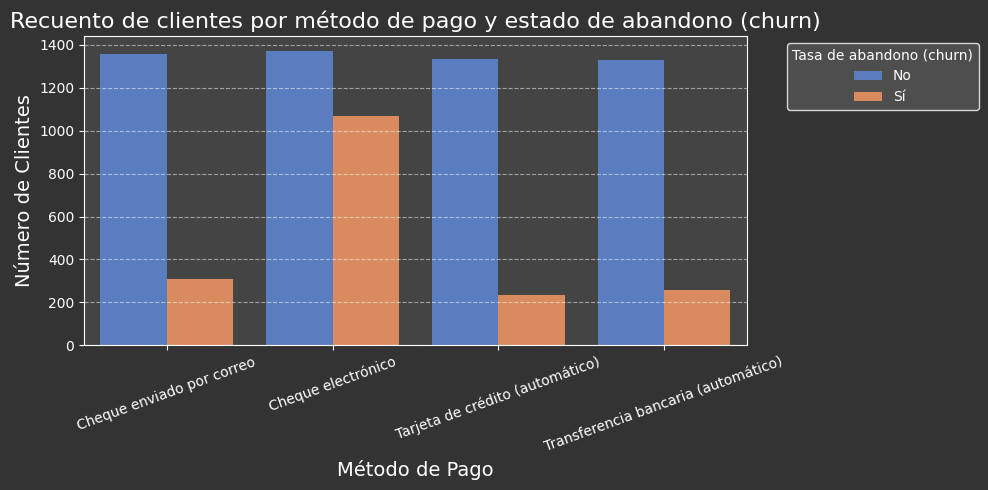

In [43]:
#Creando el gráfico
plt.style.use('dark_background')
plt.figure(figsize=(10, 5))
sns.countplot(data=datos_transformados,
              x='Método de Pago',
              hue='Tasa de Abandono (Churn)',
              palette='muted')

#Título
plt.title('Recuento de clientes por método de pago y estado de abandono (churn)', fontsize=16, color='white')

#Especificando labels
plt.xlabel('Método de Pago', fontsize=14, color='white')
plt.ylabel('Número de Clientes', fontsize=14, color='white')

#Ajustando labels
plt.xticks(rotation=20, color='white')
plt.yticks(color='white')

#Ajustando el cuadro de leyenda
leg = plt.legend(title='Tasa de abandono (churn)', bbox_to_anchor=(1.05, 1), loc='upper left')
leg.get_frame().set_facecolor('#555555')
leg.get_frame().set_edgecolor('white')
plt.setp(leg.get_texts(), color='white')
plt.setp(leg.get_title(), color='white')

#Ajustando el cuadriculado
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.gca().set_facecolor('#444444')
plt.gcf().set_facecolor('#333333')

#Mostrar el gráfico
plt.tight_layout()
plt.show()

###Gráfico de barras verticales: recuento de clientes entre adulto mayor y estado de abandono (churn)

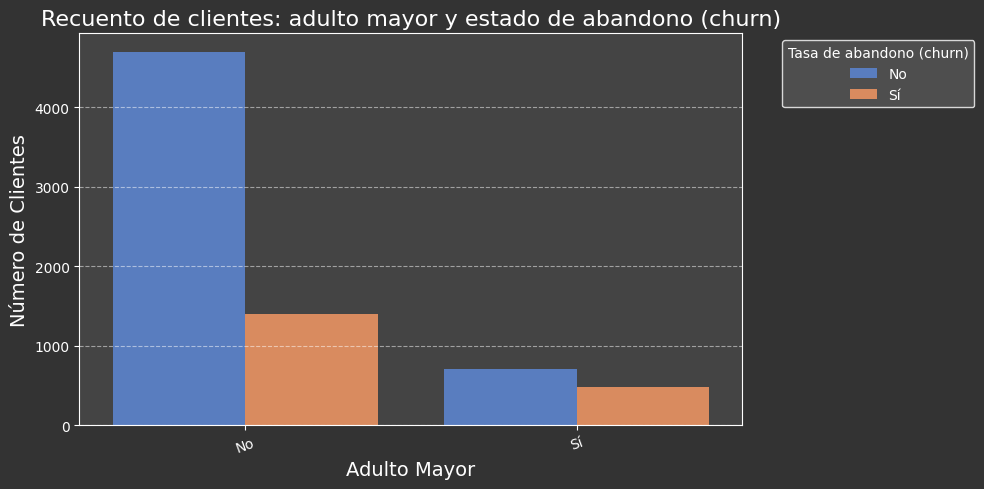

In [44]:
#Creando el gráfico para Adulto Mayor
plt.style.use('dark_background')
plt.figure(figsize=(10, 5))
sns.countplot(data=datos_transformados,
              x='Adulto Mayor',
              hue='Tasa de Abandono (Churn)',
              palette='muted')

#Título
plt.title('Recuento de clientes: adulto mayor y estado de abandono (churn)', fontsize=16, color='white')

#Especificando labels
plt.xlabel('Adulto Mayor', fontsize=14, color='white')
plt.ylabel('Número de Clientes', fontsize=14, color='white')

#Ajustando labels
plt.xticks(rotation=20, color='white')
plt.yticks(color='white')

#Ajustando el cuadro de leyenda
leg = plt.legend(title='Tasa de abandono (churn)', bbox_to_anchor=(1.05, 1), loc='upper left')
leg.get_frame().set_facecolor('#555555')
leg.get_frame().set_edgecolor('white')
plt.setp(leg.get_texts(), color='white')
plt.setp(leg.get_title(), color='white')

#Ajustando el cuadriculado
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.gca().set_facecolor('#444444')
plt.gcf().set_facecolor('#333333')

#Mostrar el gráfico
plt.tight_layout()
plt.show()

##Conteo de evasión por variables numéricas

###Boxplot: distribución de meses de contrato según tasa de abanadono

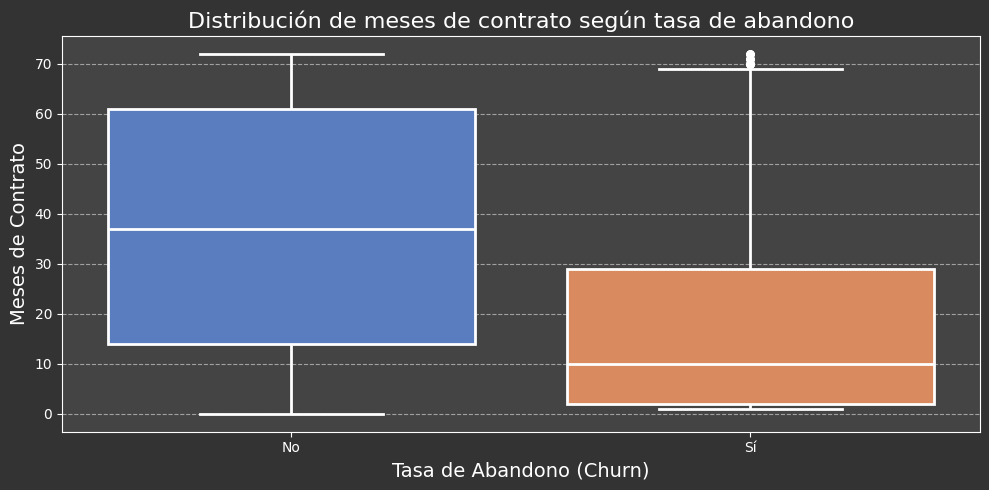

In [45]:
#Crear figura
plt.figure(figsize=(10, 5))

#Crear boxplot con estilo personalizado
sns.boxplot(data=datos_transformados,
            x='Tasa de Abandono (Churn)',
            y='Meses de Contrato',
            palette='muted',
            hue='Tasa de Abandono (Churn)',  #Añadimos hue para diferenciar visualmente
            linewidth=2,  #Grosor de las líneas
            boxprops=dict(edgecolor='white'),  #Borde blanco en cajas
            whiskerprops=dict(color='white'),  #Bigotes blancos
            capprops=dict(color='white'),  #Extremos de bigotes blancos
            medianprops=dict(color='white'),  #Mediana blanca
            flierprops=dict(marker='o', markerfacecolor='white', markersize=5,
                            linestyle='none', markeredgecolor='white')  #Outliers blancos
           )

#Título
plt.title('Distribución de meses de contrato según tasa de abandono', fontsize=16, color='white')

#Etiquetas de ejes
plt.xlabel('Tasa de Abandono (Churn)', fontsize=14, color='white')
plt.ylabel('Meses de Contrato', fontsize=14, color='white')

#Ajuste de ticks
plt.xticks(color='white')
plt.yticks(color='white')

#Fondo del gráfico y figura
plt.gca().set_facecolor('#444444')
plt.gcf().set_facecolor('#333333')

# Cuadriculado
plt.grid(axis='y', linestyle='--', alpha=0.5)

#Mostrar gráfico
plt.tight_layout()
plt.show()

###Boxplot: distribución de cargo total según tasa de abandono (churn)

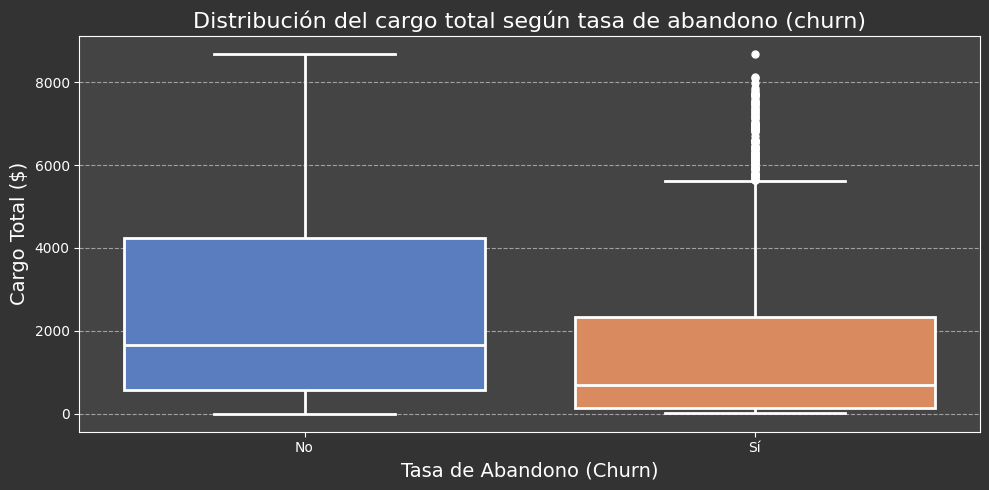

In [46]:
#Crear figura
plt.figure(figsize=(10, 5))

#Crear boxplot
sns.boxplot(data=datos_transformados,
            x='Tasa de Abandono (Churn)',
            y='Cargo Total',
            palette='muted',
            hue = 'Tasa de Abandono (Churn)',
            linewidth=2, #Aumentado el ancho de línea
            boxprops=dict(edgecolor='white'), #Color del borde de las cajas
            whiskerprops=dict(color='white'), #Color de los bigotes
            capprops=dict(color='white'), #Color de los extremos de los bigotes
            medianprops=dict(color='white'), #Color de la mediana
            flierprops=dict(marker='o', markerfacecolor='white', markersize=5,
                            linestyle='none', markeredgecolor='white') #Ajustado estilo de outliers
           )

#Título
plt.title('Distribución del cargo total según tasa de abandono (churn)', fontsize=16, color='white')

#Etiquetas de ejes
plt.xlabel('Tasa de Abandono (Churn)', fontsize=14, color='white')
plt.ylabel('Cargo Total ($)', fontsize=14, color='white')

#Ajuste de ticks
plt.xticks(color='white')
plt.yticks(color='white')

#Fondo del gráfico y figura
plt.gca().set_facecolor('#444444')
plt.gcf().set_facecolor('#333333')

#Cuadriculado
plt.grid(axis='y', linestyle='--', alpha=0.5)

#Mostrar gráfico
plt.tight_layout()
plt.show()

#🚀 Extra: análisis de correlación entre variables

###Matríz de correlación de variables numéricas

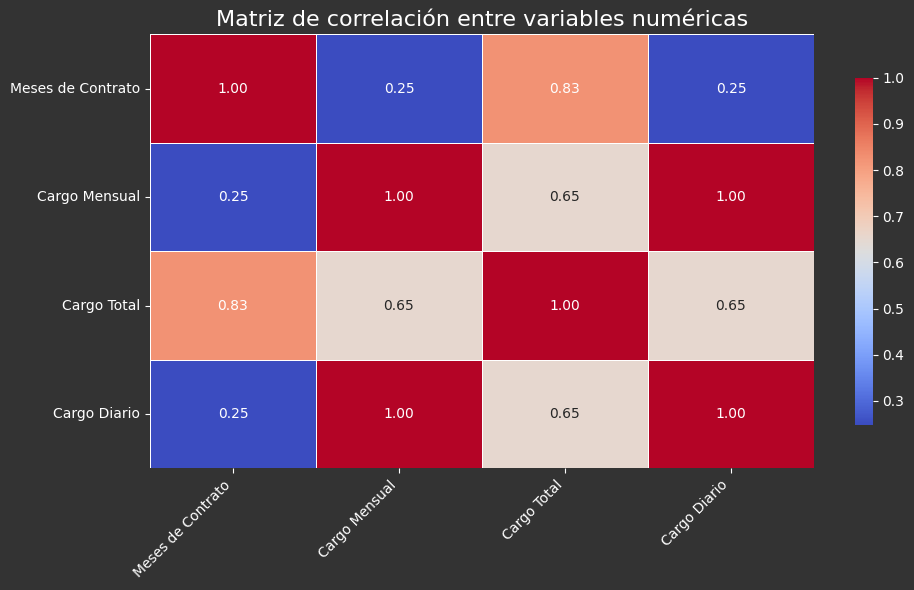

In [55]:
#Filtrar solo columnas numéricas
datos_numericos = datos_transformados.select_dtypes(include=['number'])

#Calcular matriz de correlación
correlacion = datos_numericos.corr()

#Crear figura
plt.figure(figsize=(10, 6))

#Crear mapa de calor
sns.heatmap(
    correlacion,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

#Título
plt.title("Matriz de correlación entre variables numéricas", fontsize=16, color='white')

#Ajuste de ticks
plt.xticks(color='white', rotation=45, ha='right')
plt.yticks(color='white', rotation=0)

#Fondo
plt.gca().set_facecolor('#444444')
plt.gcf().set_facecolor('#333333')

#Mostrar el gráfico
plt.tight_layout()
plt.show()

###Gráfico de barras: relación entre cantidad de servicios y tasa de abandono (churn)

In [71]:
#Lista de columnas relacionadas con servicios
columnas_servicios = [
    'Servicio Telefónico',
    'Múltiples Líneas',
    'Tipo de Internet',
    'Seguridad en Línea',
    'Respaldo en Línea',
    'Protección del Equipo',
    'Soporte Técnico',
    'TV Streaming',
    'Películas Streaming'
]

#Crear la columna 'Cantidad de Servicios' contando cuántos servicios tiene cada cliente
#Consideramos 'Sí' o 'yes' como tener el servicio
datos_transformados['Cantidad de Servicios'] = datos_transformados[columnas_servicios].apply(
    lambda row: row.astype(str).str.lower().isin(['sí', 'yes', 'dsl', 'fibra óptica']).sum(), axis=1
)

#Mostrar las primeras filas con la nueva columna
print("DataFrame con la nueva columna 'Cantidad de Servicios':")
display(datos_transformados[['Cantidad de Servicios', 'Tasa de Abandono (Churn)']].head())

DataFrame con la nueva columna 'Cantidad de Servicios':


,Cantidad de Servicios,Tasa de Abandono (Churn)
0,5,No
1,4,No
2,3,Sí
3,6,Sí
4,4,Sí


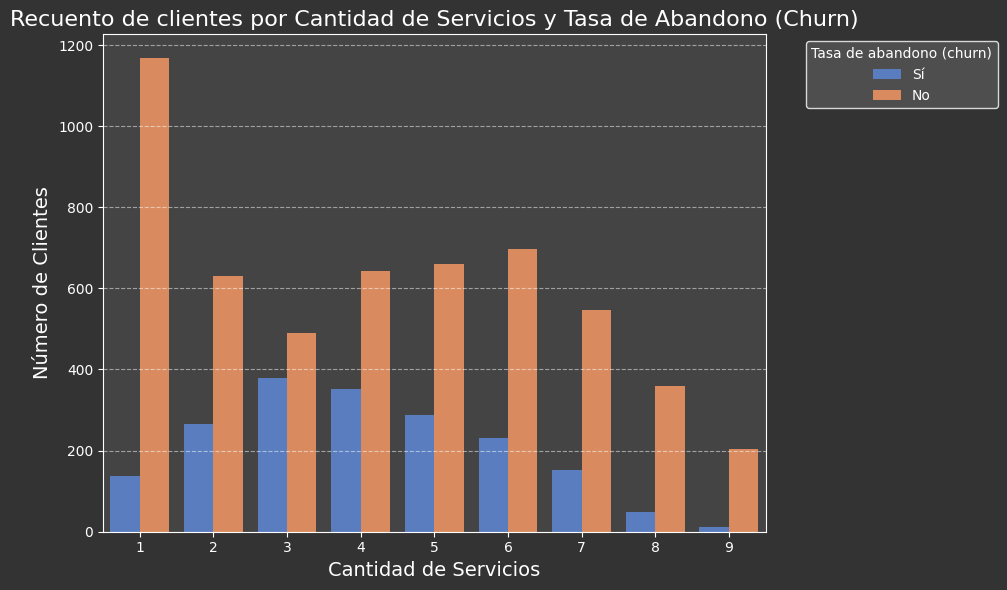

In [72]:
#Visualizar la relación entre 'Cantidad de Servicios' y 'Tasa de Abandono (Churn)'
plt.figure(figsize=(10, 6))
sns.countplot(data=datos_transformados, x='Cantidad de Servicios', hue='Tasa de Abandono (Churn)', palette='muted')

#Especificaciones del gráfico
plt.title('Recuento de clientes por Cantidad de Servicios y Tasa de Abandono (Churn)', fontsize=16, color='white')
plt.xlabel('Cantidad de Servicios', fontsize=14, color='white')
plt.ylabel('Número de Clientes', fontsize=14, color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.gca().set_facecolor('#444444')
plt.gcf().set_facecolor('#333333')
plt.grid(axis='y', linestyle='--', alpha=0.5)

#Ajustes de la leyenda
leg = plt.legend(title='Tasa de abandono (churn)', bbox_to_anchor=(1.05, 1), loc='upper left')
leg.get_frame().set_facecolor('#555555')
leg.get_frame().set_edgecolor('white')
plt.setp(leg.get_texts(), color='white')
plt.setp(leg.get_title(), color='white')

#Mostrar gráfico
plt.tight_layout()
plt.show()

#📄Informe final

##**Introducción**

El presente análisis tiene como objetivo identificar patrones y factores asociados a la evasión de clientes (o churn) en una compañía de telecomunicaciones.

El churn representa el porcentaje de clientes que cancelan su contrato en un período determinado, lo cual genera pérdidas significativas en ingresos y eleva los costos de adquisición de nuevos clientes.
Mediante este análisis, buscamos comprender qué variables influyen más en la tasa de abandono, con el fin de diseñar estrategias para reducir la deserción y fidelizar a los clientes.

##**Desarrollo**

####Limpieza y tratamiento de datos:
- Los pasos realizados para preparar la base de datos fueron:

####Importación de datos:
- Carga del archivo CSV con la información de clientes y sus características contractuales.

####Revisión de valores nulos y duplicados:
- Se identificaron y eliminaron registros incompletos o repetidos.

####Transformación de datos:
- Conversión de columnas a tipos de datos adecuados (fechas, numéricos y categóricos).

####Creación de variables derivadas:
- Se generaron nuevas métricas, como Tasa de Abandono (Churn) y Meses de Contrato.

####Estandarización de nombres de columnas:
- Mejora de la legibilidad y consistencia para el análisis.

Todos los pasos de esta etapa garantizaron que los datos estuvieran limpios, consistentes y listos para su análisis exploratorio.

## **Análisis Exploratorio de Datos (EDA)**

A continuación, se presentan las visualizaciones generadas y los hallazgos principales:

1. **Gráfico de barras verticales: número de clientes de acuerdo a la tasa de abandono (churn) y su género**  
   El gráfico evidencia que existe una distribución equilibrada entre hombres y mujeres en cuanto a la tasa de abandono, sin diferencias notables por género.

2. **Gráfico de pastel: proporción de clientes de acuerdo a su tasa de abandono (churn)**  
   La proporción muestra que aproximadamente una cuarta parte de los clientes ha abandonado el servicio, evidenciando la magnitud del problema.

3. **Gráfico de barras verticales: recuento de clientes por género y tasa de abandono (churn)**  
   Se confirma que tanto hombres como mujeres presentan tasas de abandono similares, por lo que el género no parece ser un factor determinante.

4. **Gráfico de barras verticales: recuento de clientes por tipo de contrato y estado de abandono (churn)**  
   Los clientes con contratos mensuales presentan una tasa de abandono considerablemente mayor que aquellos con contratos a largo plazo.

5. **Gráfico de barras verticales: recuento de clientes por método de pago y estado de abandono (churn)**  
   Los clientes que pagan mediante métodos electrónicos como mes a mes muestran una mayor tendencia al abandono que quienes usan transferencias o pagos automáticos.

6. **Gráfico de barras verticales: recuento de clientes entre adulto mayor y estado de abandono (churn)**  
   Los adultos mayores presentan una tasa de abandono ligeramente mayor, lo que podría asociarse a factores de satisfacción o adaptabilidad al servicio.

7. **Conteo de evasión por variables numéricas**  
   Se observa que ciertas variables numéricas como “Meses de Contrato” y “Cargo Total” presentan diferencias claras entre clientes que permanecen y los que abandonan.

8. **Boxplot: distribución de meses de contrato según tasa de abandono**  
   El gráfico muestra que los clientes con menor tiempo de permanencia son más propensos a abandonar.

9. **Boxplot: distribución de cargo total según tasa de abandono (churn)**  
   Se evidencia que los clientes que han pagado cargos más altos presentan tasas de abandono mayores, posiblemente por percepción de costos elevados.

10. **Matriz de correlación entre variables numéricas**   
  La matriz muestra fuertes correlaciones positivas entre las variables relacionadas a cargos y duración del contrato:

- Meses de Contrato y Cargo Total: alta
correlación (0.83).

- Cargo Mensual y Cargo Diario: correlación perfecta (1.00).

- Cargo Mensual y Cargo Total: correlación moderada-alta (0.65).

11. **Gráfico de barras: recuento de clientes según cantidad de servicios y tasa de abandono (churn)**       
  El gráfico muestra que los clientes con pocos servicios suelen permanecer, pero a medida que se incrementa la cantidad de servicios, hay una mayor proporción relativa de abandono.

## **Conclusiones e Insights**

- El **tipo de contrato** es un factor clave: los contratos mensuales concentran la mayor parte de la evasión.  
- Los **métodos de pago** como mes a mes y tarjetas de crédito no automatizadas se asocian con mayores tasas de churn.  
- El **tiempo de permanencia** es crítico: clientes nuevos o con pocos meses de contrato abandonan con más frecuencia.  
- El **cargo total** elevado puede ser un desencadenante para la cancelación del servicio.  
- El **género** no representa un factor determinante en el abandono.
- La **cantidad de servicios contratados** puede influir en la tasa de abandono. Clientes con pocos servicios tienden a mantenerse más, y la evasión es más vista en clientes con múltiples servicios.


## **Recomendaciones**

- **Incentivar contratos a largo plazo** mediante descuentos o beneficios adicionales para reducir el churn en clientes de contrato mensual.  
- **Promover métodos de pago automáticos** para mejorar la retención.  
- **Implementar programas de fidelización** orientados a clientes nuevos durante los primeros meses de contrato.  
- **Revisar y ajustar políticas de precios**, especialmente para clientes con cargos totales altos.  
- **Realizar encuestas de satisfacción** específicas para adultos mayores a fin de adaptar el servicio a sus necesidades.
- **Evaluar la satisfacción y experiencia de clientes con múltiples servicios** para detectar posibles problemas específicos que motiven el abandono.
- **Ofrecer paquetes o bundles optimizados y acompañamiento personalizado** a clientes con varios servicios para mejorar su retención.
